In [17]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("../data/iwildcam_2022_crops_bioclip_inference_logits_v3.csv")
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)
gdf = gdf.to_crs(epsg=3857)

In [19]:
gdf["geometry"].nunique()

192

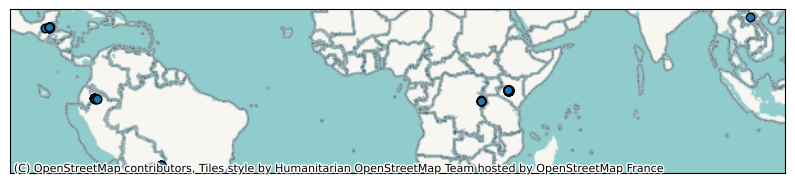

In [24]:
ax = gdf.iloc[gdf.reset_index().groupby(["geometry"])["index"].min().to_list()].plot(figsize=(10, 10), edgecolor="k")
cx.add_basemap(ax)
ax.set_xticks([], [])
ax.set_yticks([], [])
plt.savefig("figures/map.pdf", transparent=True, bbox_inches="tight")